In [12]:
import pandas as pd
import numpy as np
%matplotlib inline
df = pd.read_csv('../data/dnaq_15s_interval.csv', parse_dates=['collection_time'], index_col='collection_time')

In [13]:
df.head()

,COS,P,Ia,Ib,Ic,Ua,Ub,Uc,elec_degree
collection_time,,,,,,,,,
2022-01-01 00:00:00,0.00,0.000000,0.0,0.0,0.0,372.0,373.0,372.0,198436.0
2022-01-01 00:00:15,0.89,36.700001,65.0,67.0,67.0,373.0,370.0,372.0,385070.0
2022-01-01 00:00:30,0.00,0.000000,0.0,0.0,0.0,379.0,376.0,377.0,306434.0
2022-01-01 00:00:45,0.00,0.000000,0.0,0.0,0.0,379.0,376.0,377.0,306434.0
2022-01-01 00:01:00,0.00,0.000000,0.0,0.0,0.0,379.0,376.0,377.0,306434.0


In [14]:
df.describe()

,COS,P,Ia,Ib,Ic,Ua,Ub,Uc,elec_degree
count,2.102400e+06,2.102400e+06,2.102400e+06,2.102400e+06,2.102400e+06,2.102400e+06,2.102400e+06,2.102400e+06,2.102400e+06
mean,2.618581e-01,1.188181e+01,2.154199e+01,2.199635e+01,2.152753e+01,3.704435e+02,3.677363e+02,3.682782e+02,3.212523e+05
std,4.084807e-01,2.283711e+01,4.114467e+01,4.193228e+01,4.137665e+01,4.042916e+01,4.012618e+01,4.027807e+01,2.435444e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.710000e+02,3.690000e+02,3.690000e+02,8.383600e+04
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,3.720000e+02,3.730000e+02,3.666340e+05
75%,8.700000e-01,2.850000e+01,5.400000e+01,5.500000e+01,5.500000e+01,3.800000e+02,3.760000e+02,3.770000e+02,4.470450e+05
max,9.800000e-01,3.034000e+02,8.300000e+02,8.480000e+02,8.340000e+02,4.100000e+02,4.070000e+02,4.140000e+02,1.476757e+06


array([[<Axes: title={'center': 'COS'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'Ia'}>],
       [<Axes: title={'center': 'Ib'}>, <Axes: title={'center': 'Ic'}>,
        <Axes: title={'center': 'Ua'}>],
       [<Axes: title={'center': 'Ub'}>, <Axes: title={'center': 'Uc'}>,
        <Axes: title={'center': 'elec_degree'}>]], dtype=object)

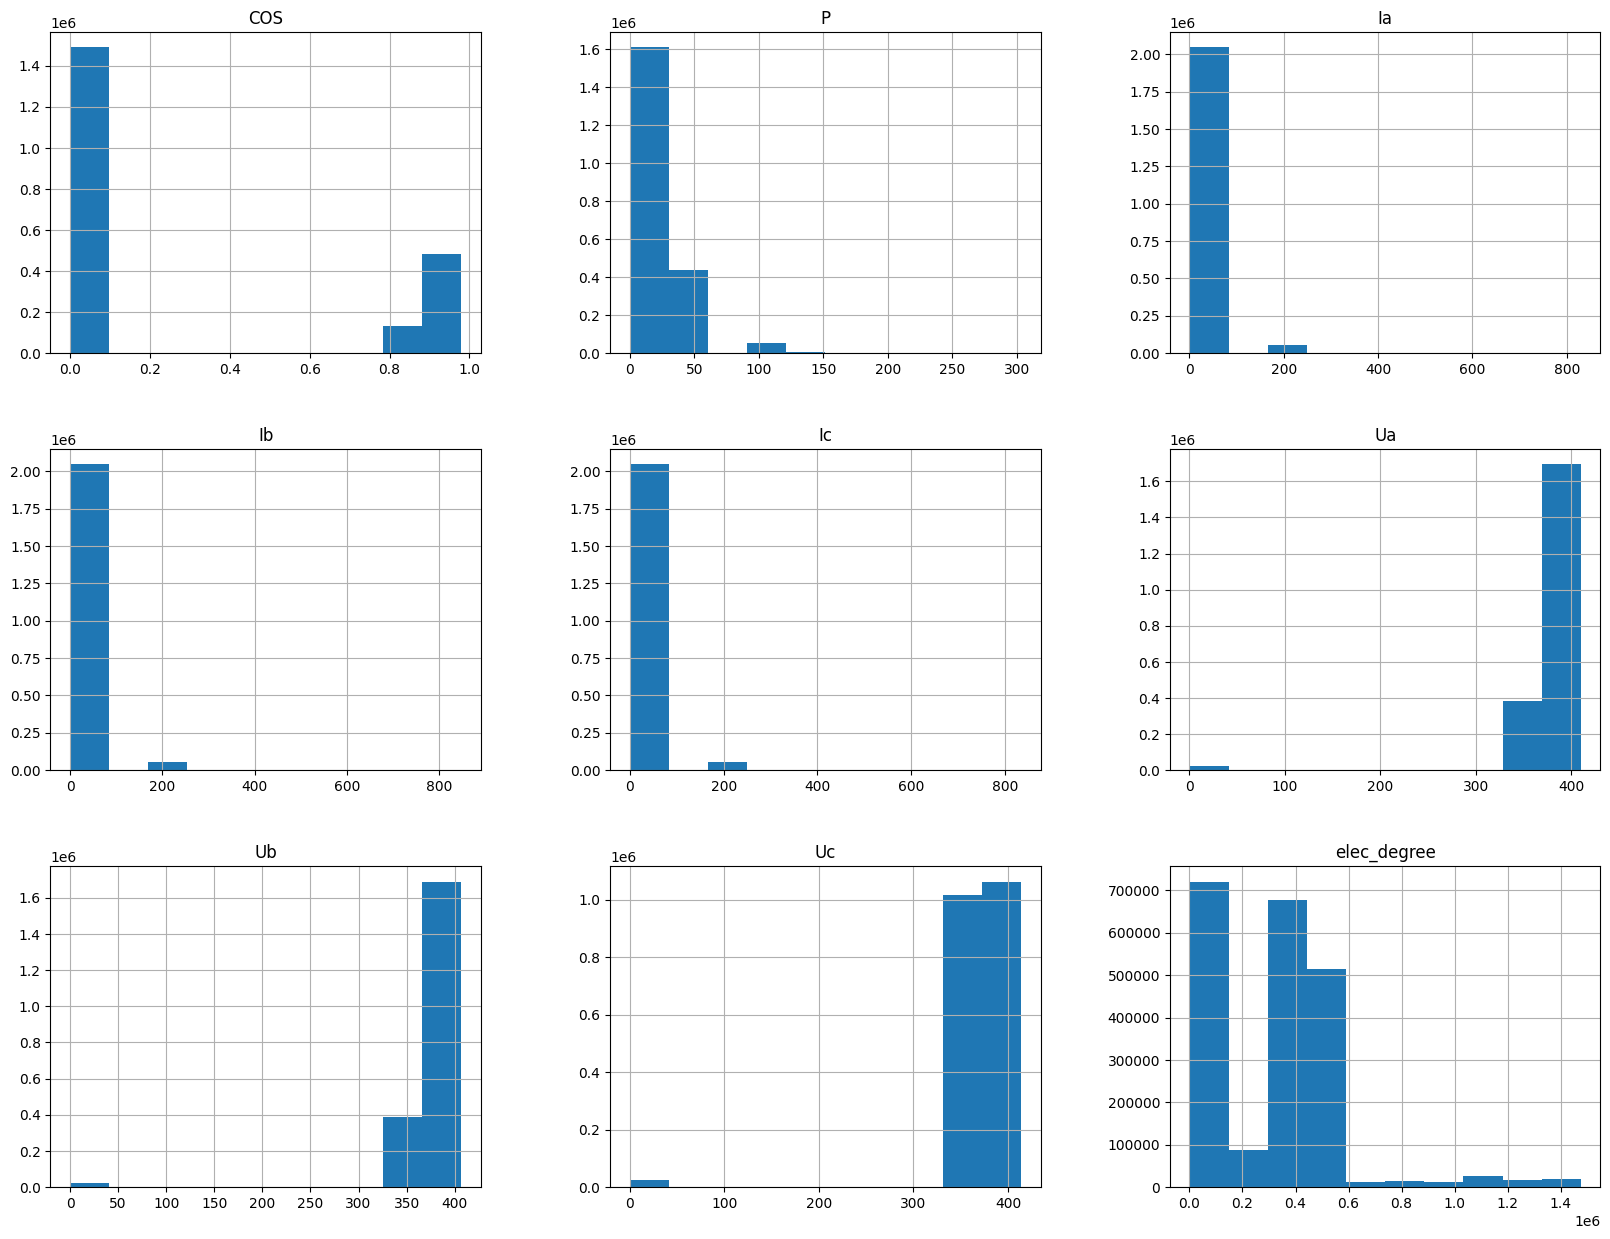

In [15]:
df.hist(figsize=(20, 15))

数据呈现明显的长尾分布，需要对数据进行变换

In [16]:
features_col = ['COS', 'P', 'Ia', 'Ib', 'Ic', 'Ua', 'Ub', 'Uc', 'elec_degree']


Correlation Matrix:
                  COS         P        Ia        Ib        Ic        Ua  \
COS          1.000000  0.820166  0.825079  0.826612  0.820096 -0.031201   
P            0.820166  1.000000  0.999445  0.999328  0.999320 -0.025779   
Ia           0.825079  0.999445  1.000000  0.999905  0.999727 -0.027212   
Ib           0.826612  0.999328  0.999905  1.000000  0.999694 -0.027353   
Ic           0.820096  0.999320  0.999727  0.999694  1.000000 -0.027632   
Ua          -0.031201 -0.025779 -0.027212 -0.027353 -0.027632  1.000000   
Ub          -0.032549 -0.020705 -0.022381 -0.022535 -0.022308  0.998296   
Uc          -0.040223 -0.025472 -0.027221 -0.027317 -0.027273  0.997006   
elec_degree  0.250030  0.498379  0.497520  0.497802  0.502126  0.115540   

                   Ub        Uc  elec_degree  
COS         -0.032549 -0.040223     0.250030  
P           -0.020705 -0.025472     0.498379  
Ia          -0.022381 -0.027221     0.497520  
Ib          -0.022535 -0.027317     0.49

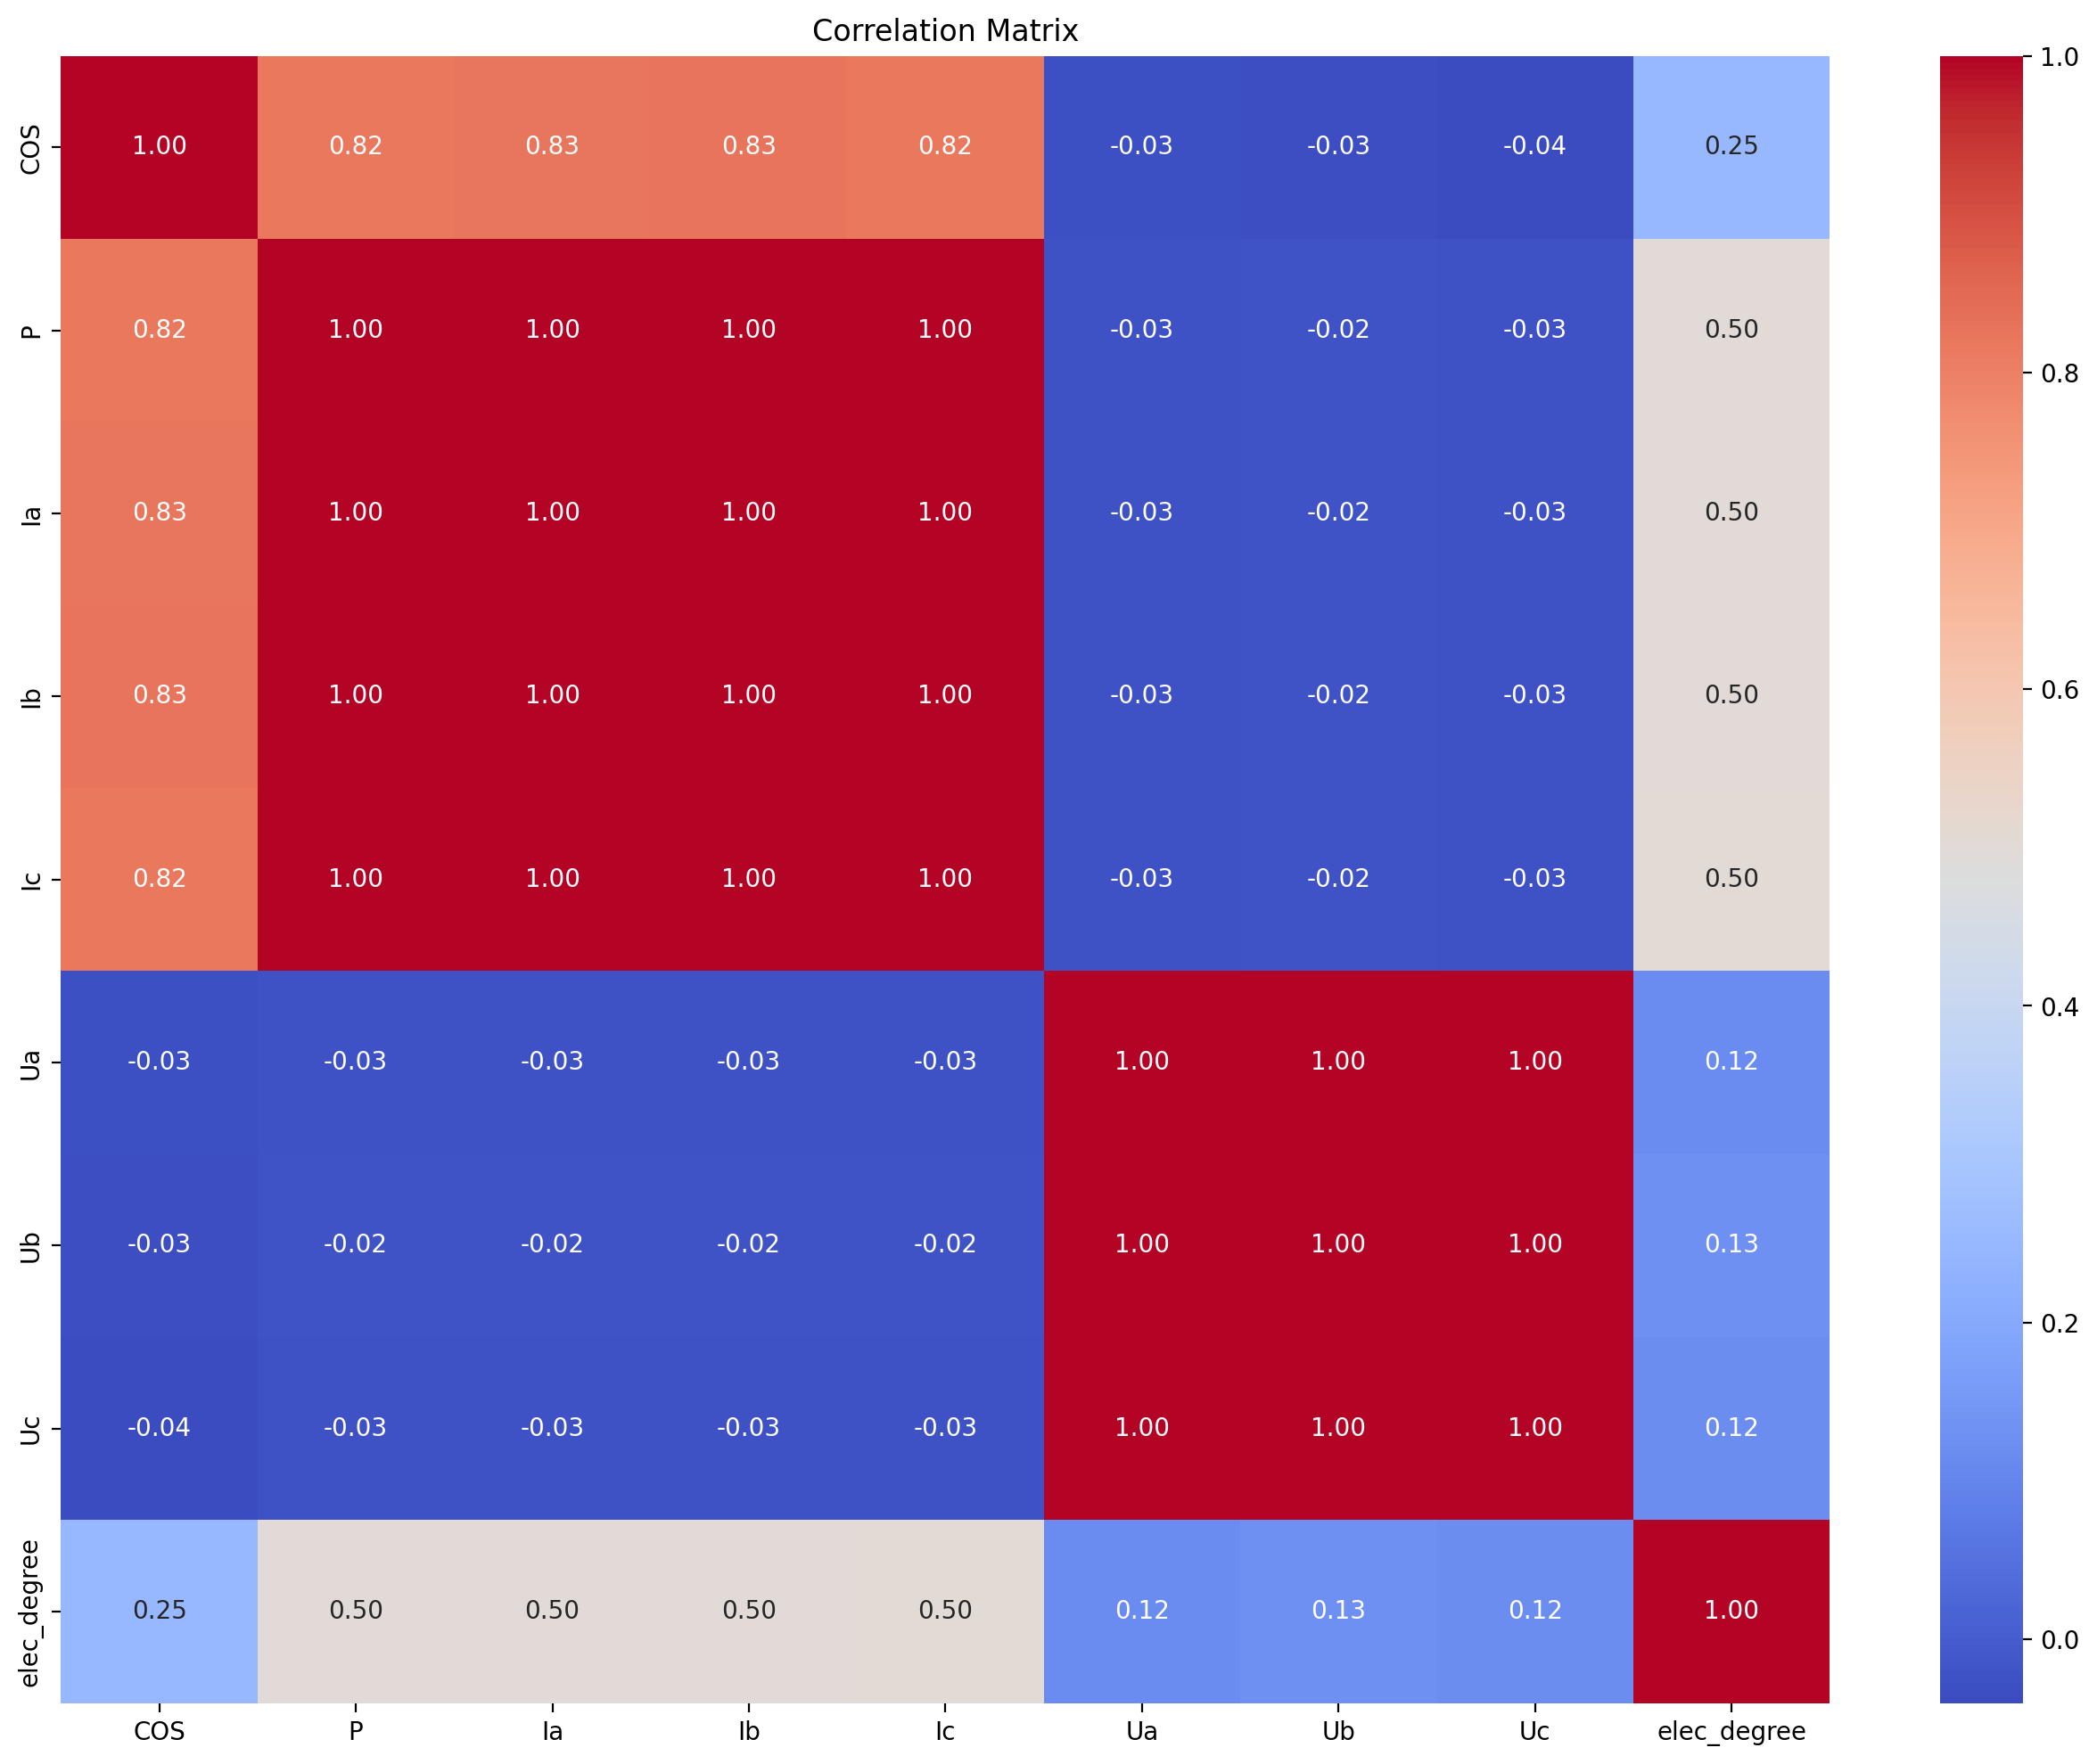

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix = df[features_col].corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(16, 12), dpi=200)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

1. COS与电流(Ia, Ib, Ic)和功率(P)之间的正相关性：COS与Ia、Ib、Ic以及P的相关系数在0.82左右，这表明COS与这些电流以及功率之间存在中等到强的正线性关系。这可能意味着随着COS的增加，这些电流和功率也呈正向增加。

2. 电流(Ia, Ib, Ic)与功率(P)之间的极强正相关性：Ia、Ib、Ic与P的相关系数几乎接近1，特别是Ia与P的相关系数为0.999445，这表明它们之间存在非常强的正线性关系。这意味着电流的变化与功率的变化几乎是同步的。

3. 电压(Ua, Ub, Uc)之间的强正相关性：Ua、Ub与Uc之间的相关系数非常接近1，说明它们之间存在强烈的正线性关系。这可能表明，当一个电压值变化时，其他电压值也会以相似的方式变化。

4. COS、电流(Ia, Ib, Ic)、功率(P)与电压(Ua, Ub, Uc)之间的负相关性：尽管这些负相关性较弱（相关系数约为-0.02到-0.04），但它们表明电流、功率与电压之间存在轻微的负线性关系。

5. 电力角度(elec_degree)与其他变量的相关性：elec_degree与P、Ia、Ib、Ic的相关系数在0.49至0.50之间，表明中等强度的正线性关系。同时，elec_degree与电压的相关性较弱（0.115至0.127之间），但依然是正的。

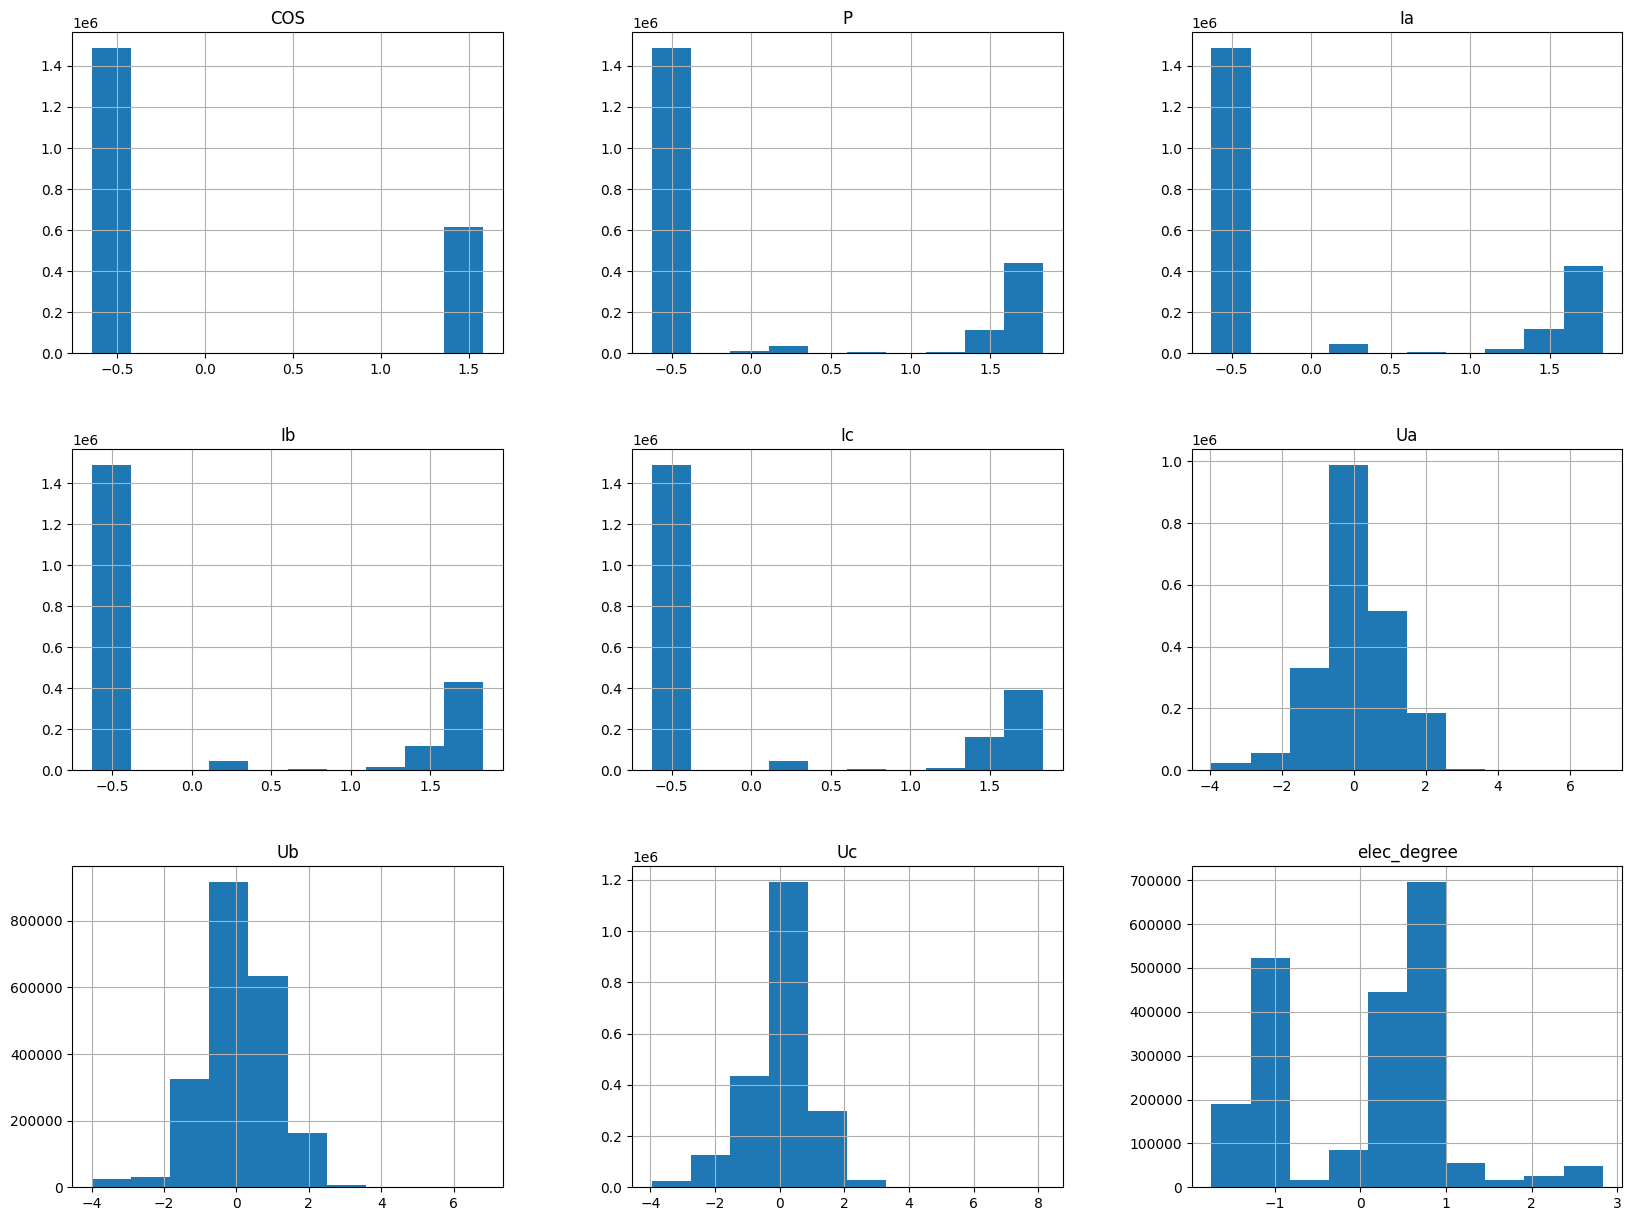

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

# 标准化和 Box-cox 变换
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler), ('p', power)])
df_transformed = pipeline.fit_transform(df)
colnames = list(df.columns)
dataset = pd.DataFrame(df_transformed, columns=colnames)
dataset.hist(figsize=(20, 15))
plt.show()

In [30]:
# 尝试采用对数变换
class LogTransformation:
    @staticmethod
    def transform(x):
        xt = np.sign(x) * np.log(np.abs(x) + 1)
        return xt
    
    @staticmethod
    def inverse_transform(xt):
        x = np.sign(xt) * (np.exp(np.abs(xt)) - 1)
        return x

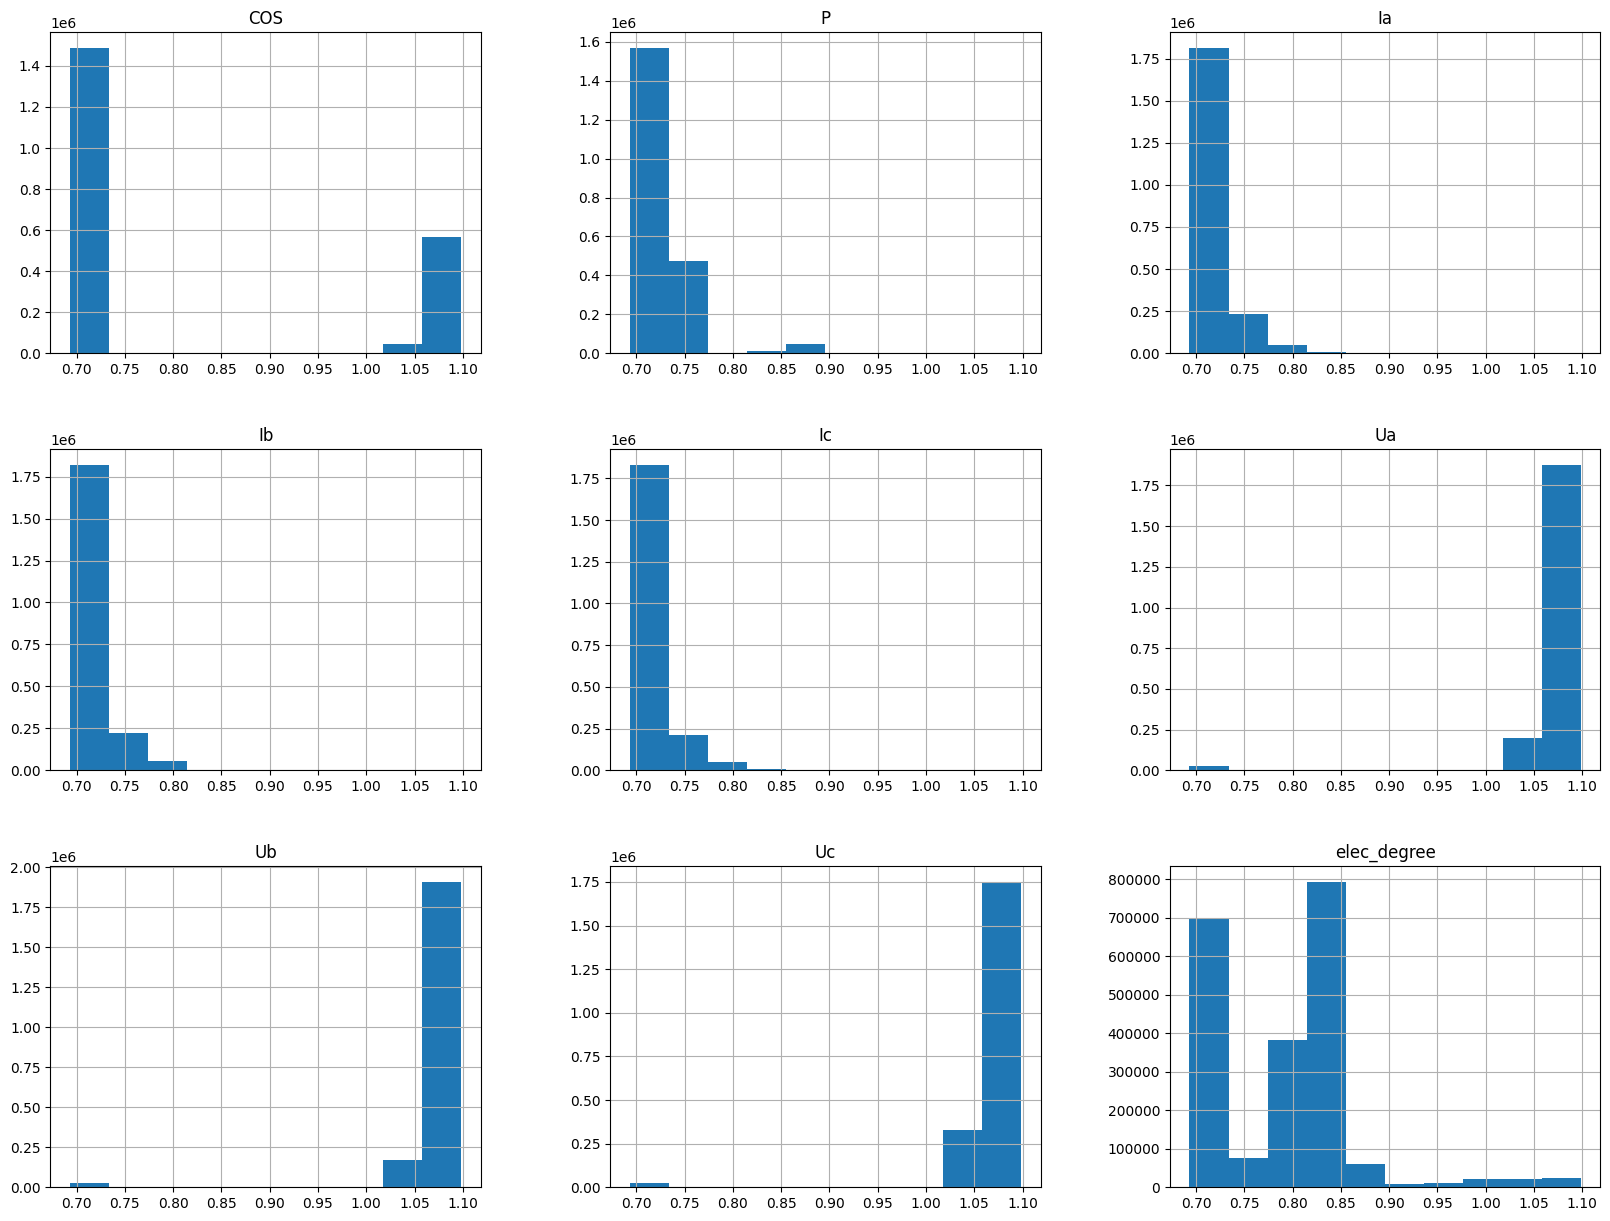

In [32]:
# 标准化和 log 变换
scaler = MinMaxScaler(feature_range=(1, 2))
scaler.fit(df)
df_scaled = scaler.transform(df)
df_log = LogTransformation.transform(df_scaled)
colnames = list(df.columns)
dataset = pd.DataFrame(df_log, columns=colnames)
dataset.hist(figsize=(20, 15))
plt.show()